### Target: FNGU - Tech, [HMMJ](https://www.horizonsetfs.com/horizons/media/pdfs/productsheets/HMMJ-Product-Sheet.pdf) - Weed stonks, or [XEG](https://www.blackrock.com/ca/investors/en/products/239839/ishares-sptsx-capped-energy-index-etf) - Candian OIL

Network stuff

i should have read this first https://engineeringfordatascience.com/posts/visualising_asset_price_correlations/

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd

# !pip install yfinance networkx
import yfinance as yf
import networkx as nx

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 6)   # Change the size of plots
plt.style.use('fivethirtyeight')  
  
  
start = datetime.datetime(2016,1,1)
# start = datetime.datetime(2018, 2, 1)
# end = datetime.datetime(2020, 9, 13)
end = datetime.date.today()

Populating the interactive namespace from numpy and matplotlib


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

<AxesSubplot:xlabel='Date'>

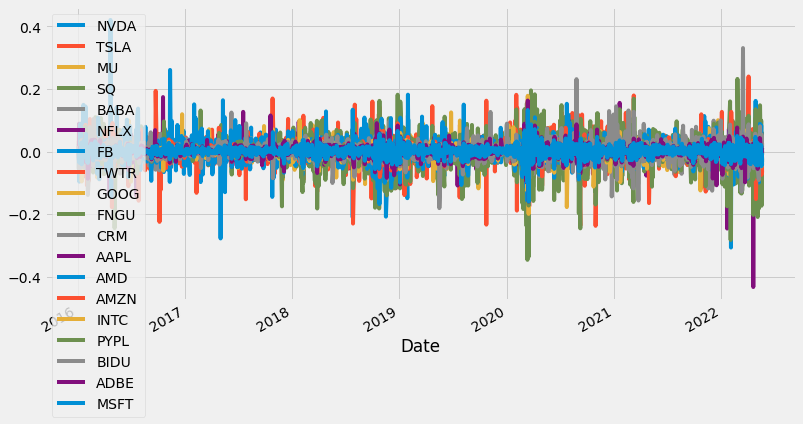

In [3]:
USE_LOG_RETURN = True
# // should add the ETFs: TIT and TEC 
# ls = ['HMMJ.to','ogi','hexo','cweb','smg','tlry','acb','cron','weed.TO'] # ,'weed'
# ls = ['XEG.to', 'SU.to','CNQ.to','CVE.to','TOU.to','IMO.to','PXT.to','CPG.to','PSK.to','ARX.to','WCP.to'] # 'PXT.to' and after are less weighted in XEG - which is market cap weighted
ls = ['FNGU','AAPL','NFLX','GOOG','FB','AMZN','BABA','BIDU','NVDA','TSLA','TWTR'] # FNGU ETF   MSFT is very highly corr-ed with FNGU
ls.extend(['ADBE', 'AMD', 'AMZN', 'CRM', 'INTC', 'MSFT', 'MU', 'NFLX', 'PYPL', 'SQ']) # BULZ ETF
ETF = ls[0]
ls  = list(set(ls))



data = {} 

for i in ls:
  arry= yf.download(i, start, end)

  if USE_LOG_RETURN:
    data[i] =  pd.Series(np.diff(np.log(arry["Adj Close"])), index=arry.index[1:])
  else:
    data[i] = arry["Adj Close"]

stocks = pd.DataFrame(data)

# stocks=stocks.dropna()
stocks.plot(grid = True)

In [4]:
# np.sum(stocks.isna())
stocks.shape
stocks.dropna(inplace=True)
stocks.shape
stocks.head(5)

(1607, 19)

(1090, 19)

,NVDA,TSLA,MU,SQ,BABA,NFLX,FB,TWTR,GOOG,FNGU,CRM,AAPL,AMD,AMZN,INTC,PYPL,BIDU,ADBE,MSFT
Date,,,,,,,,,,,,,,,,,,,
2018-01-24,-0.013103,-0.019752,-0.019994,-0.015449,0.016761,0.043049,-0.014898,-0.016844,-0.004910,-0.002056,-0.003450,-0.016057,-0.017934,-0.003698,-0.012013,-0.005955,0.002367,-0.011612,-0.000871
2018-01-25,0.002330,-0.024141,-0.001626,0.017890,0.014219,0.031641,0.004973,-0.009432,0.005251,-0.000749,-0.007918,-0.018012,-0.023887,0.014945,-0.004625,0.007498,-0.014919,-0.001366,0.005539
2018-01-26,0.029105,0.015313,0.015229,0.018663,0.034150,0.018005,0.013352,0.090952,0.004663,0.079351,0.015422,0.002335,0.042593,0.017339,0.100315,0.013075,0.023757,0.019007,0.018564
2018-01-29,0.014362,0.019296,-0.008740,-0.011816,-0.010827,0.035734,-0.021385,0.036809,-0.000221,0.016980,-0.003524,-0.020916,0.028171,0.011086,-0.001999,-0.013431,-0.025372,-0.015368,-0.001489
2018-01-30,-0.016872,-0.010671,-0.038140,0.001979,-0.016639,-0.020555,0.006111,0.017323,-0.010166,-0.028462,-0.009489,-0.005912,-0.034368,0.014106,-0.024097,-0.006306,-0.038816,-0.006732,-0.012644


In [5]:
if not USE_LOG_RETURN:
    roi = (stocks.iloc[-1] - stocks.iloc[1])/stocks.iloc[1]
    roi = round(roi*100)
    roi = pd.DataFrame(roi)
    roi.transpose()
    roi.plot.bar()

<AxesSubplot:xlabel='Date'>

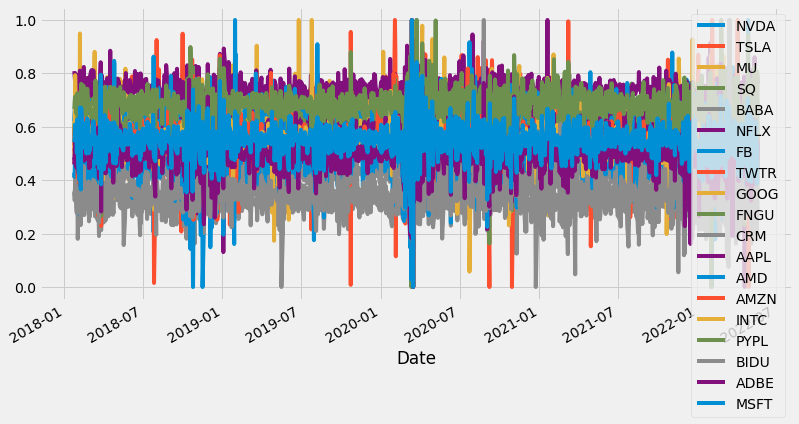

In [6]:
def scale_data(df):
  # mean norm  # normalized_df=(df-df.mean())/df.std()
   return (df-df.min())/(df.max()-df.min()) 

stocks_norm = scale_data(stocks)
stocks_norm.plot()

# Selecting the most correlated


In [7]:
from scipy.stats import spearmanr
stocks_norm_spearmanr = pd.DataFrame(spearmanr(stocks_norm)[0], columns=stocks.columns, index=stocks.columns)
stocks_norm_spearmanr_cumSum = stocks_norm_spearmanr.cumsum()
stocks_norm_spearmanr_cumSum

,NVDA,TSLA,MU,SQ,BABA,NFLX,FB,TWTR,GOOG,FNGU,CRM,AAPL,AMD,AMZN,INTC,PYPL,BIDU,ADBE,MSFT
NVDA,1.000000,0.454922,0.628997,0.606657,0.458587,0.534288,0.557736,0.464214,0.615826,0.767633,0.602689,0.622960,0.714558,0.623778,0.624402,0.615722,0.456131,0.668366,0.663946
TSLA,1.454922,1.454922,0.973860,1.035650,0.793333,0.915837,0.914653,0.795172,0.995120,1.414952,1.011394,1.046710,1.128079,1.031910,1.025576,1.008389,0.817012,1.105829,1.080797
MU,2.083919,1.799785,1.973860,1.499190,1.208621,1.305800,1.366752,1.207080,1.510665,1.995104,1.448622,1.543371,1.672029,1.509001,1.680071,1.457615,1.245110,1.585708,1.597998
SQ,2.690576,2.228778,2.437400,2.499190,1.664996,1.817633,1.868197,1.732369,2.030766,2.673044,2.065865,2.054294,2.203251,2.085926,2.097098,2.149263,1.732591,2.217634,2.167715
BABA,3.149162,2.563525,2.852687,2.955565,2.664996,2.237909,2.325757,2.169191,2.498403,3.348387,2.493666,2.500840,2.581759,2.563614,2.510235,2.624478,2.407943,2.664563,2.633828
NFLX,3.683450,2.945074,3.242650,3.467398,3.085272,3.237909,2.860357,2.574504,3.014402,4.036676,3.048573,3.008816,3.046570,3.185973,2.945006,3.162918,2.825381,3.268891,3.194146
FB,4.241186,3.301990,3.694750,3.968843,3.542831,3.772509,3.860357,3.129361,3.724807,4.763722,3.602068,3.587173,3.527597,3.810660,3.407270,3.770174,3.252415,3.895028,3.818237
TWTR,4.705400,3.632949,4.106658,4.494132,3.979653,4.177822,4.415215,4.129361,4.217478,5.421849,4.072798,4.025811,3.927925,4.269681,3.798991,4.286714,3.695686,4.386231,4.284522
GOOG,5.321226,4.012242,4.622203,5.014233,4.447291,4.693821,5.125620,4.622032,5.217478,6.165627,4.684817,4.685121,4.431994,4.956202,4.352395,4.900605,4.169205,5.064499,5.035302
FNGU,6.088859,4.659561,5.202355,5.692173,5.122633,5.382111,5.852665,5.280159,5.961256,7.165627,5.362970,5.416632,5.064489,5.713428,4.959143,5.595708,4.856700,5.798914,5.762015


In [8]:
corrwith = stocks_norm.corr()
corr_cumSum = corrwith.cumsum()
corr_cumSum

,NVDA,TSLA,MU,SQ,BABA,NFLX,FB,TWTR,GOOG,FNGU,CRM,AAPL,AMD,AMZN,INTC,PYPL,BIDU,ADBE,MSFT
NVDA,1.000000,0.460181,0.645980,0.641130,0.442989,0.491790,0.564978,0.430420,0.654177,0.780802,0.620441,0.657152,0.698537,0.637223,0.588400,0.599825,0.418435,0.692772,0.715084
TSLA,1.460181,1.460181,1.008630,1.100010,0.769097,0.844251,0.904400,0.733067,1.054084,1.459558,1.058236,1.114082,1.099878,1.049607,0.958199,1.019208,0.778518,1.154288,1.184016
MU,2.106161,1.822832,2.008630,1.611382,1.182240,1.203390,1.360043,1.127049,1.603147,2.074864,1.534012,1.658209,1.638442,1.528131,1.588380,1.489283,1.196272,1.683300,1.769987
SQ,2.747290,2.281712,2.520003,2.611382,1.652217,1.710100,1.887875,1.609653,2.157557,2.787686,2.155355,2.212054,2.156533,2.119217,2.039813,2.190539,1.672912,2.329283,2.387580
BABA,3.190280,2.607821,2.933145,3.081359,2.652217,2.103835,2.293672,1.976957,2.591809,3.453245,2.571205,2.645475,2.516747,2.552119,2.410947,2.641054,2.349740,2.769675,2.837149
NFLX,3.682069,2.960282,3.292284,3.588069,3.045952,3.103835,2.794327,2.321832,3.088371,4.122779,3.102895,3.100656,2.936565,3.146458,2.774615,3.147010,2.702971,3.335061,3.352398
FB,4.247048,3.299704,3.747927,4.115900,3.451749,3.604489,3.794327,2.796094,3.754988,4.845737,3.685416,3.681933,3.368420,3.757193,3.221304,3.730192,3.070145,3.951340,3.976110
TWTR,4.677468,3.602351,4.141910,4.598504,3.819053,3.949364,4.268589,3.796094,4.225321,5.469598,4.117942,4.118515,3.692676,4.170637,3.608635,4.174595,3.428804,4.420129,4.440288
GOOG,5.331645,4.002257,4.690973,5.152914,4.253305,4.445926,4.935206,4.266426,5.225321,6.241773,4.760520,4.806022,4.211023,4.838293,4.168719,4.750038,3.851031,5.137086,5.233676
FNGU,6.112447,4.681014,5.306278,5.865735,4.918865,5.115459,5.658164,4.890287,5.997496,7.241773,5.466879,5.573264,4.839577,5.608870,4.754594,5.436852,4.510597,5.902144,6.015568


In [9]:
stocks_norm_spearmanr_cumSum.sort_values(ETF, inplace=True, axis=1)
top_N = stocks.columns.shape[0] // 3
top_N = stocks.columns.shape[0]# // 3

keepThese = stocks_norm_spearmanr_cumSum.iloc[:, -top_N:]

keepThese = keepThese.columns.to_list()
# if ETF not in keepThese:
#     keepThese.append(ETF)

# corr = stocks_norm_spearmanr[keepThese].round(2) # all rows. wont work well with code below (networkx)
corr = stocks_norm_spearmanr.loc[keepThese, keepThese].round(2) # only row the index rows
corr = corr - np.eye(len(corr))
corr

,TSLA,BIDU,INTC,AMD,BABA,MU,TWTR,CRM,NFLX,AAPL,PYPL,SQ,AMZN,MSFT,ADBE,FB,GOOG,NVDA,FNGU
TSLA,0.00,0.36,0.40,0.41,0.33,0.34,0.33,0.41,0.38,0.42,0.39,0.43,0.41,0.42,0.44,0.36,0.38,0.45,0.65
BIDU,0.36,0.00,0.41,0.38,0.68,0.43,0.44,0.46,0.42,0.45,0.46,0.49,0.46,0.46,0.47,0.43,0.47,0.46,0.69
INTC,0.40,0.41,0.00,0.50,0.41,0.65,0.39,0.46,0.43,0.56,0.51,0.42,0.49,0.57,0.52,0.46,0.55,0.62,0.61
AMD,0.41,0.38,0.50,0.00,0.38,0.54,0.40,0.51,0.46,0.51,0.52,0.53,0.54,0.55,0.56,0.48,0.50,0.71,0.63
BABA,0.33,0.68,0.41,0.38,0.00,0.42,0.44,0.43,0.42,0.45,0.48,0.46,0.48,0.47,0.45,0.46,0.47,0.46,0.68
MU,0.34,0.43,0.65,0.54,0.42,0.00,0.41,0.44,0.39,0.50,0.45,0.46,0.48,0.52,0.48,0.45,0.52,0.63,0.58
TWTR,0.33,0.44,0.39,0.40,0.44,0.41,0.00,0.47,0.41,0.44,0.52,0.53,0.46,0.47,0.49,0.55,0.49,0.46,0.66
CRM,0.41,0.46,0.46,0.51,0.43,0.44,0.47,0.00,0.55,0.57,0.67,0.62,0.62,0.71,0.76,0.55,0.61,0.60,0.68
NFLX,0.38,0.42,0.43,0.46,0.42,0.39,0.41,0.55,0.00,0.51,0.54,0.51,0.62,0.56,0.60,0.53,0.52,0.53,0.69
AAPL,0.42,0.45,0.56,0.51,0.45,0.50,0.44,0.57,0.51,0.00,0.59,0.51,0.65,0.71,0.63,0.58,0.66,0.62,0.73


In [10]:
# corr.cumsum() # shows which are the most correlated with each other. This is illustated in `nx.draw_spectral(graph, with_labels=True)`

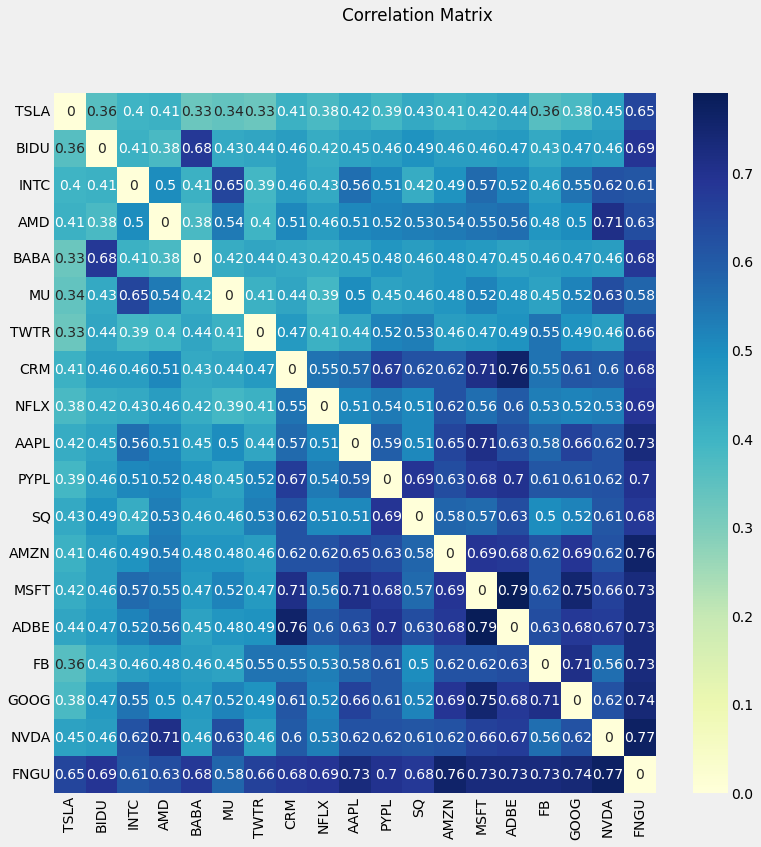

In [11]:
_=plt.subplots(figsize=(12, 12))
_=plt.suptitle("Correlation Matrix")
_=sns.heatmap(corr, annot=True, cmap="YlGnBu")

In [12]:
# for (u,v,d) in G.edges(data=True):
#     d['weight']

In [13]:
numb_edges = 10

# pos_corr_mat = np.where(corr_mat >= avg, corr_mat, 0)
all = corr.values.flatten()
all = all[all.nonzero()]
all = np.sort(all)[::-1]
# thresh = np.average(all) + 2*np.std(all)
thresh = all[numb_edges]


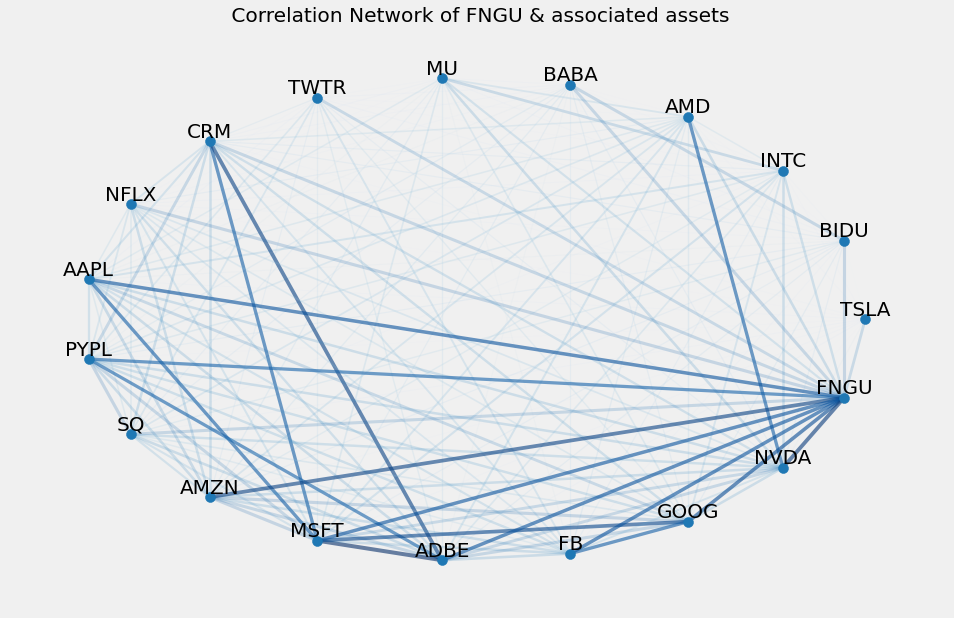

In [14]:
_=plt.figure(figsize=(15, 10))
_=plt.title(f" Correlation Network of {ETF} & associated assets")

G=nx.Graph()
# G=graph

for i in range(len(corr)):
  for j in range(len(corr)):
    if i!=j: # doesnt work.... 
      if np.abs(corr.iloc[i,j]) > 0.25:
        G.add_edge(keepThese[i], keepThese[j], weight=corr.iloc[i,j])

# for i in G.nodes():
#     G.remove_edge(i, i)



pos=nx.spring_layout(G) # positions for all nodes
pos=nx.circular_layout(G) # positions for all nodes

# nodes
_=nx.draw_networkx_nodes(G,pos, node_size=100)


# Two types of egdes
# elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >= thresh]
# esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] < thresh]
# _=nx.draw_networkx_edges(G,pos,edgelist=esmall,
#                     width=1.5,alpha=0.25,edge_color='r') # ,style='dashed'
# _=nx.draw_networkx_edges(G,pos,edgelist=elarge,
#                     width=3,alpha=1,edge_color='g')
# ###############################################################################

# continuous width & alpha of edges 
weights = np.array([G[u][v]['weight'] for u,v in G.edges()])
weights_scaled = scale_data(weights)
width = np.array(weights_scaled) * 4

weights_shewed = np.log(weights_scaled+1, where=weights_scaled != 0) # force a right shew
alpha = scale_data(weights_shewed)
alpha = np.where(alpha < .35, .1, alpha)
alpha = np.where((alpha > .35) & (alpha < .85), .2, alpha)
alpha = np.where(alpha > .85, .6, alpha)
# alpha

_=nx.draw_networkx_edges(G,pos, alpha=alpha, width=width,
  edge_color=weights_scaled, edge_cmap=plt.cm.Blues)
# ###############################################################################

# labels
_=nx.draw_networkx_labels(G,pos, font_size=20, verticalalignment='bottom')

_=plt.axis('off')
# plt.savefig("weighted_graph.png") # save as png
plt.show() # display

In [15]:
corr_mat = np.matrix(corr, dtype=None)

graph = nx.from_numpy_matrix(corr_mat)
mapping = lambda i: keepThese[i]

graph = nx.relabel_nodes(graph, mapping)

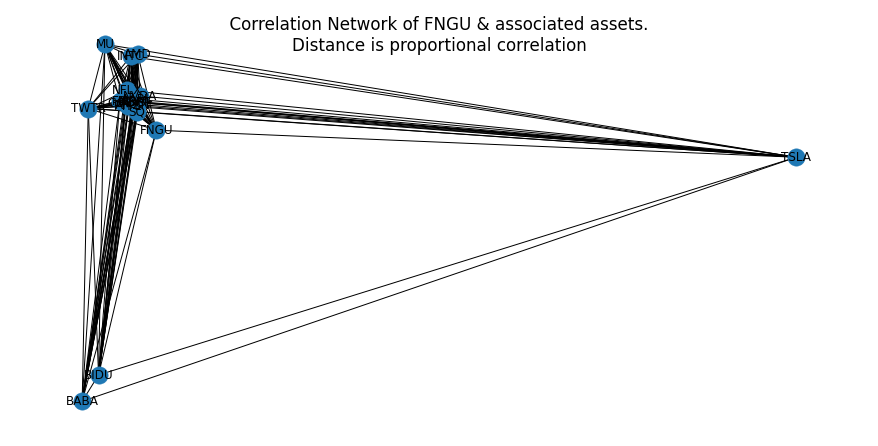

In [16]:
_=plt.suptitle(f" Correlation Network of {ETF} & associated assets. \nDistance is proportional correlation")
nx.draw_spectral(graph, with_labels=True)
# # nx.draw_shell(graph, with_labels=True, cmap=plt.get_cmap('jet'), node_size=500) # node_color='blue'

# # corr.cumsum() # shows which are the most correlated with each other. This is illustated in `nx.draw_spectral(graph, with_labels=True)`

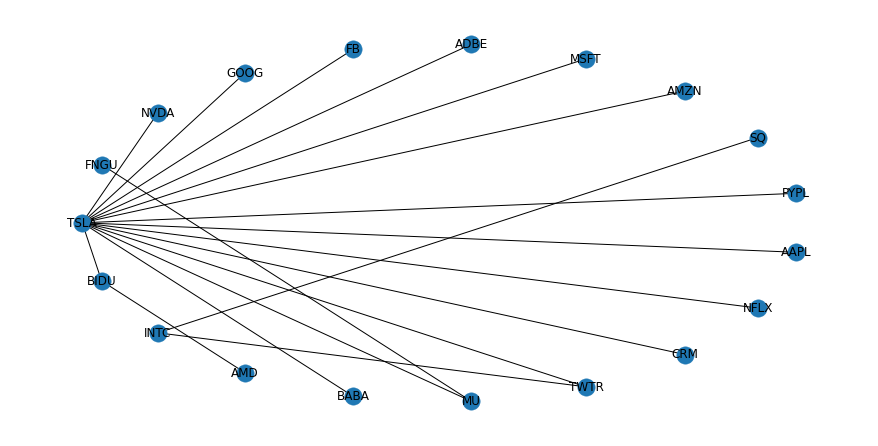

In [17]:
# # spanning tree 
span = nx.minimum_spanning_tree(graph)
nx.draw_shell(span, with_labels=True)